### Collections

Heterogeneous collections of geometric objects may result from some Shapely operations. For example, two LineStrings may intersect along a line and at a point. To represent these kind of results, Shapely provides frozenset-like, immutable collections of geometric objects. The collections may be homogeneous (MultiPoint etc.) or heterogeneous.


In [5]:
from shapely import LineString

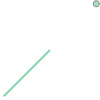

In [6]:
a = LineString([(0, 0), (1, 1), (1,2), (2,2)])
b = LineString([(0, 0), (1, 1), (2,1), (2,2)])

x = a.intersection(b)
x

In [7]:
list(x.geoms)

[<LINESTRING (0 0, 1 1)>, <POINT (2 2)>]

### Collections of Points

- class MultiPoint(points)
- The MultiPoint constructor takes a sequence of (x, y[, z ]) point tuples.

### A MultiPoint has zero area and zero length.


In [9]:
from shapely import MultiPoint

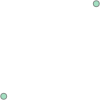

In [10]:
points = MultiPoint([(0.0, 0.0), (1.0, 1.0)])
points

In [11]:
points.area

0.0

In [13]:
points.length

0.0

In [14]:
points.bounds

(0.0, 0.0, 1.0, 1.0)

In [15]:
list(points.geoms)

[<POINT (0 0)>, <POINT (1 1)>]

In [17]:
from shapely import Point

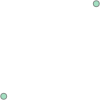

In [19]:
MultiPoint([Point(0, 0), Point(1, 1)])

### Collection of Lines

- class MultiLineString(lines)
- The MultiLineString constructor takes a sequence of line-like sequences or objects.


In [21]:
from shapely.geometry import MultiLineString
from shapely.plotting import plot_line, plot_points


mline1 = MultiLineString([((0, 0), (1, 1)), ((0, 2),  (1, 1.5), (1.5, 1), (2, 0))])

mline2 = MultiLineString([((0, 0), (1, 1), (1.5, 1)), ((0, 2), (1, 1.5), (1.5, 1), (2, 0))])

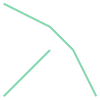

In [22]:
mline1

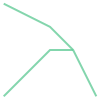

In [23]:
mline2

In [40]:
import matplotlib.pyplot as plt

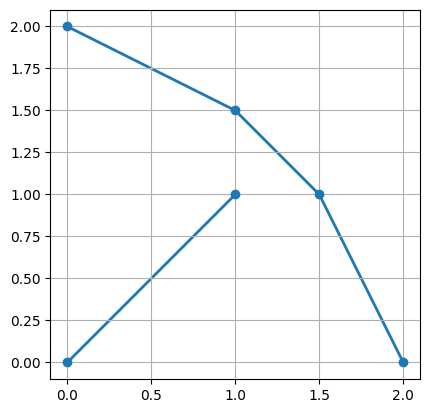

In [42]:
plot_line(mline1)
plt.show()

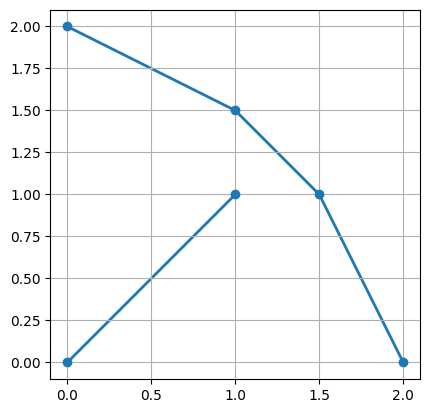

In [43]:
plot_line(mline1)
plt.show()

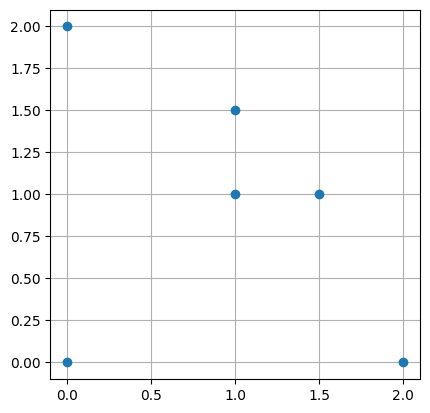

In [44]:
plot_points(mline1)
plt.show()

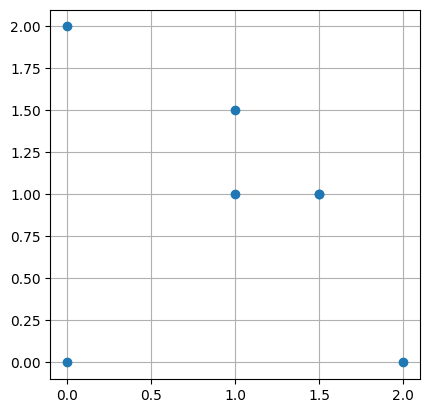

In [45]:
plot_points(mline2)
plt.show()

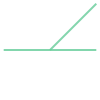

In [29]:
from shapely import MultiLineString
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)
lines

In [30]:
lines.area

0.0

In [31]:
lines.length

3.414213562373095

In [33]:
lines.bounds

(-1.0, 0.0, 1.0, 1.0)

### Collections of Polygons

- class MultiPolygon(polygons)
- The MultiPolygon constructor takes a sequence of exterior ring and hole list tuples: [((a1, …, aM), [(b1, …, bN), …]), …].


In [37]:
from shapely.geometry import MultiPolygon
from shapely.plotting import plot_polygon, plot_points

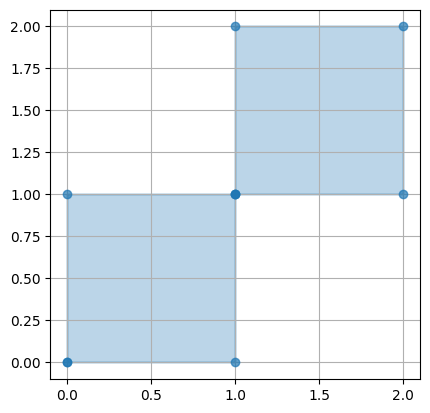

In [46]:
a = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]
b = [(1, 1), (1, 2), (2, 2), (2, 1), (1, 1)]

multi1 = MultiPolygon([[a, []], [b, []]])

plot_polygon(multi1, add_points=False )
plot_points(multi1, alpha=0.7)

plt.show()

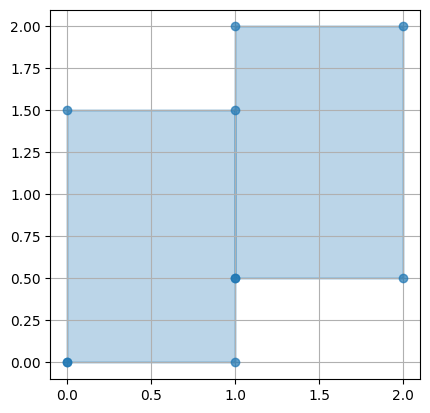

In [49]:
c = [(0, 0), (0, 1.5), (1, 1.5), (1, 0), (0, 0)]
d = [(1, 0.5), (1, 2), (2, 2), (2, 0.5), (1, 0.5)]

multi2 = MultiPolygon([[c, []], [d, []]])

plot_polygon(multi2,  add_points=False)
plot_points(multi2, alpha=0.7)
plt.show()

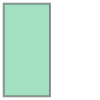

In [52]:
from shapely import wkt
p1 = wkt.loads('POLYGON((0 0, 1 0, 1 1, 0 1, 0 0))')
p2 = wkt.loads('POLYGON((0.5 0, 1.5 0, 1.5 1, 0.5 1, 0.5 0))')
p2 & p1

In [53]:
from shapely.ops import voronoi_diagram
points = MultiPoint([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
regions = voronoi_diagram(points)
list(regions.geoms)

[<POLYGON ((2 1, 2 0.5, 0.5 0.5, 0 1, 1 2, 2 1))>,
 <POLYGON ((6 -3, 3.75 -3, 2 0.5, 2 1, 6 5, 6 -3))>,
 <POLYGON ((-3 -3, -3 1, 0 1, 0.5 0.5, 0.5 -3, -3 -3))>,
 <POLYGON ((0.5 -3, 0.5 0.5, 2 0.5, 3.75 -3, 0.5 -3))>,
 <POLYGON ((-3 5, 1 5, 1 2, 0 1, -3 1, -3 5))>,
 <POLYGON ((6 5, 2 1, 1 2, 1 5, 6 5))>]

In [ ]:
from shapely.plotting import voronoi_diagram

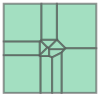

In [56]:
voronoi_diagram(regions)

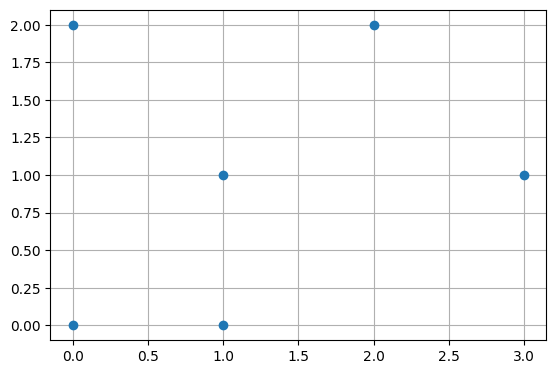

In [55]:
plot_points(points)

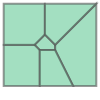

In [57]:
regions

In [59]:
from shapely import Polygon

In [60]:
from shapely.ops import nearest_points
triangle = Polygon([(0, 0), (1, 0), (0.5, 1), (0, 0)])
square = Polygon([(0, 2), (1, 2), (1, 3), (0, 3), (0, 2)])
list(nearest_points(triangle, square))

[<POINT (0.5 1)>, <POINT (0.5 2)>]

(<matplotlib.patches.PathPatch at 0x20bf2064f80>,
 <matplotlib.lines.Line2D at 0x20bf20313d0>)

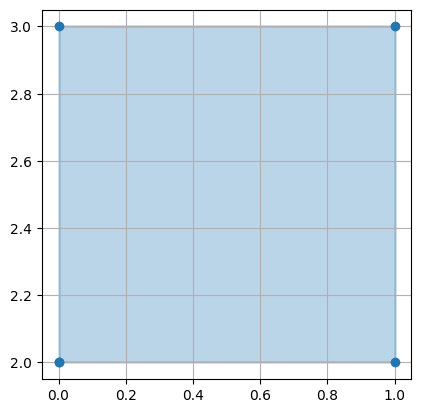

In [63]:
plot_polygon(square)

In [65]:
coords = [(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 1), (0, 0)]
p = Polygon(coords)
from shapely.validation import explain_validity
explain_validity(p)

'Ring Self-intersection[1 1]'

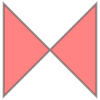

In [66]:
p

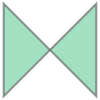

In [71]:
from shapely.validation import make_valid
coords = [(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 1), (0, 0)]
p = Polygon(coords)
make_valid(p)

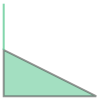

In [72]:
from shapely.validation import make_valid
coords = [(0, 2), (0, 1), (2, 0), (0, 0), (0, 2)]
p = Polygon(coords)
make_valid(p)

In [73]:
from shapely import STRtree
points = [Point(i, i) for i in range(10)]
tree = STRtree(points)
query_geom = Point(2,2).buffer(0.99)
[points[idx].wkt for idx in tree.query(query_geom)]

['POINT (2 2)']

In [75]:
Point(0, 0).wkt


'POINT (0 0)'

In [76]:
Point(0, 0).wkb


b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [77]:
Point(0, 0).wkb_hex

'010100000000000000000000000000000000000000'

In [78]:
from shapely import wkb
pt = Point(0, 0)
wkb.dumps(pt)

b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [80]:
pt.wkb

b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [79]:
wkb.loads(pt.wkb).wkt

'POINT (0 0)'

In [81]:
from shapely import wkt
pt = Point(0, 0)
thewkt = wkt.dumps(pt)
thewkt

'POINT (0.0000000000000000 0.0000000000000000)'

In [82]:
import numpy as np
np.asarray(Point(0, 0).coords)

array([[0., 0.]])

In [83]:
np.asarray(LineString([(0, 0), (1, 1)]).coords)


array([[0., 0.],
       [1., 1.]])